In [1]:
# coding: utf-8

import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import feature
import utils
import blend

img_list = utils.load_images('../input_image/parrington')

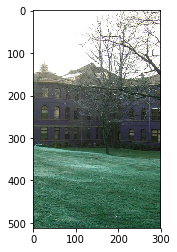

In [7]:
plt.imshow(img_list[0][:,-300:])
plt.show()

In [8]:
cylinder_img_list = [utils.cylindrical_projection(img, 706) for img in img_list]

blended_image = cylinder_img_list[0].copy()
img = cylinder_img_list[1].copy()

print('Find corner response 1')
corner_response1 = feature.harris_corner(blended_image)
descriptors1, position1 = feature.extract_description(blended_image, corner_response1, kernel=5)

print('Find corner response 2')
corner_response2 = feature.harris_corner(img)
descriptors2, position2 = feature.extract_description(img, corner_response2, kernel=5)

print('Feature matching')
mp = feature.matching(descriptors1, descriptors2, position1, position2)

print('Find best shift using RANSAC')
shift = blend.RANSAC(mp)

Find corner response 1
Find corner response 2
Feature matching
Find best shift using RANSAC


In [33]:
# img should bigger than img2
def blending(img1, img2, shift):
    padding = [
        (shift[0] if shift[0] > 0 else 0, -shift[0] if shift[0] < 0 else 0),
        (shift[1] if shift[1] > 0 else 0, -shift[1] if shift[1] < 0 else 0),
        (0, 0)
    ]
    shifted_img1 = np.lib.pad(img1, padding, 'constant', constant_values=0)
    
    h1, w1, _ = shifted_img1.shape
    h2, w2, _ = img2.shape
    
    inv_shift = [h1-h2, w1-w2]
    inv_padding = [
        (inv_shift[0], 0) if shift[0] < 0 else (0, inv_shift[0]),
        (inv_shift[1], 0) if shift[1] < 0 else (0, inv_shift[1]),
        (0, 0)
    ]
    shifted_img2 = np.lib.pad(img2, inv_padding, 'constant', constant_values=0)


#    plt.imshow(shifted_img)
#    plt.show()
#    plt.imshow(shifted_img2)
#    plt.show()

    for y in range(h1):
        for x in range(w1):
            color1 = shifted_img1[y][x]
            color2 = shifted_img2[y][x]
            
            if list(color1) == [0, 0, 0]:
                shifted_img1[y][x] = color2
            elif list(color2) == [0, 0, 0]:
                shifted_img1[y][x] = shifted_img1[y][x]
            else:
                ratio = x/w1
                if ((color1 - color2)**2).sum() > 100:
                    ratio = 1
                shifted_img1[y][x] = (1-ratio)*color1 + ratio*color2
      
    return shifted_img1

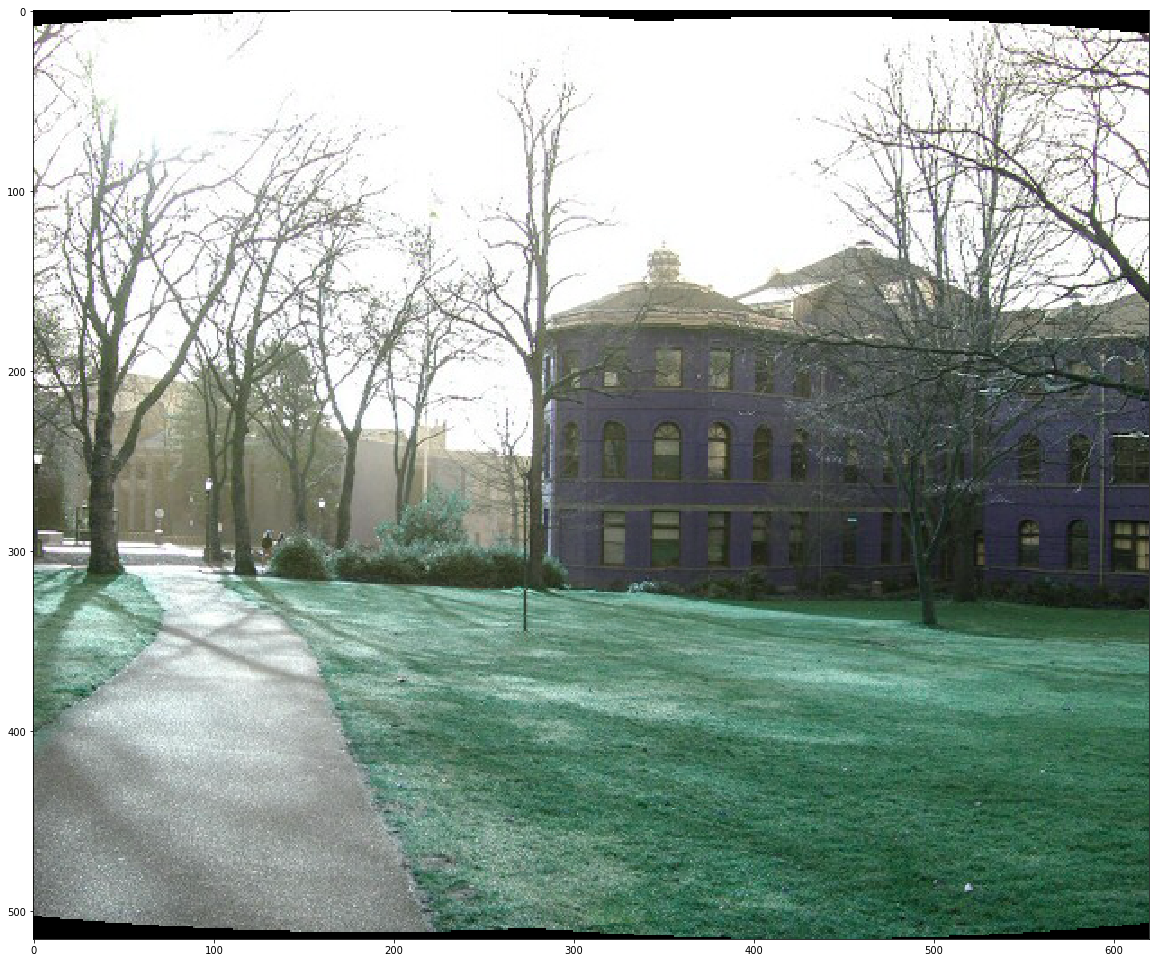

In [34]:
iii = blending(blended_image, img, shift)

plt.figure(figsize=(20,20))
plt.imshow(iii)
plt.show()

In [107]:
a,b=2,1

In [108]:
a


2

In [36]:
[(y, x) for y in range(5) for x in range(2)]

[(0, 0),
 (0, 1),
 (1, 0),
 (1, 1),
 (2, 0),
 (2, 1),
 (3, 0),
 (3, 1),
 (4, 0),
 (4, 1)]

In [ ]:
import multiprocessing as mp
pool = mp.Pool(4)#mp.cpu_count())
a = pool.map(f, [(img_list[0][y][x], img_list[0][y][x], x/1000) for y in range(100) for x in range(200)])

In [38]:
def f(x,y,z):
    return [255,0,0]